In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from pytesseract import pytesseract 
import re

from ColorSegment import *
from rePatterns import *

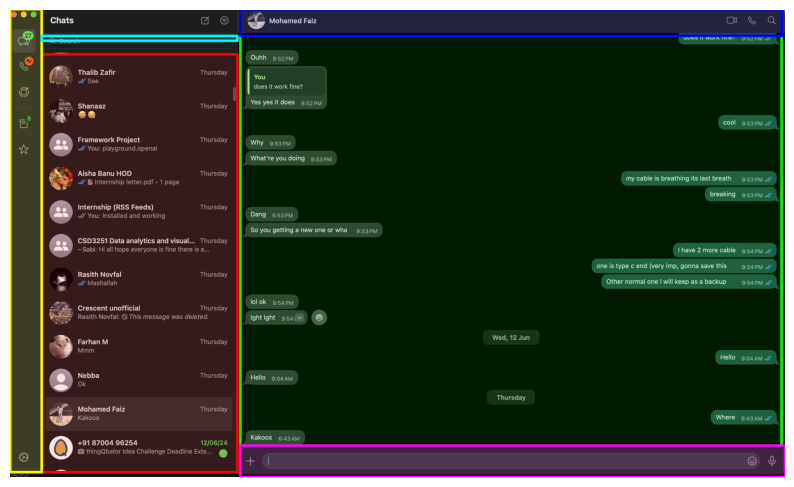

In [16]:
img_path = "Screenshot 2024-06-19 at 3.34.20 PM.png"
whatsapp_image = cv.imread(img_path)
bboxes = WhatsappSegment(whatsapp_image, alpha=0.1, show=True)

No circles were found


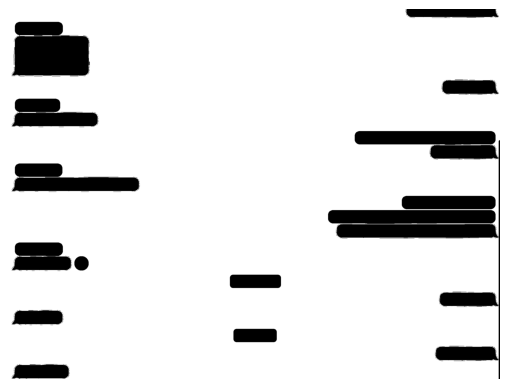

In [17]:
chat_mask_circle_removed,_ = remove_circle(img_path, ismask=False, bbox=bboxes['chat_bbox'], show=True, maxRadius=300)

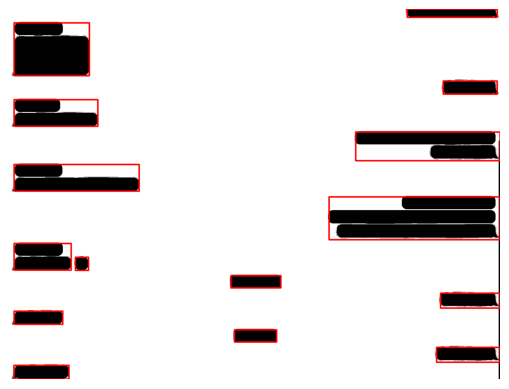

[(1788, 0, 2193, 37),
 (18, 62, 357, 300),
 (1950, 324, 2193, 383),
 (18, 408, 395, 528),
 (1556, 554, 2206, 683),
 (18, 700, 581, 820),
 (1436, 846, 2206, 1039),
 (18, 1056, 275, 1176),
 (294, 1118, 353, 1177),
 (994, 1201, 1219, 1256),
 (1938, 1280, 2206, 1347),
 (18, 1361, 237, 1420),
 (1010, 1445, 1200, 1500),
 (1920, 1524, 2206, 1591),
 (17, 1605, 265, 1667)]

In [18]:
message_bbox = chat_message_bbox(chat_mask_circle_removed, show=True, blur=20)
message_bbox = sorted(message_bbox, key=lambda x: x[1])
message_bbox

In [19]:
labels = whosaid(message_bbox=message_bbox)

In [20]:
chats_dict = {}

chat_bbox = bboxes['chat_bbox']
chat_image = whatsapp_image[chat_bbox[1]:chat_bbox[3], chat_bbox[0]:chat_bbox[2]]
for label, message_box in enumerate(message_bbox):
    message = chat_image[message_box[1]:message_box[3], message_box[0]:message_box[2]]
    message_text = pytesseract.image_to_string(message)
    if message_text != '':
        time, text_without_time = extract_time_and_remove(message_text)
        if labels[label] == 0 : chats_dict[f"Sender {label}"] = {"message_text": message_text, "dateOrTime": time}
        else: chats_dict[f"User {label}"] = {"message_text": message_text, "dateOrTime": time}

        print(message_text)

Ouhh 9:52PM

You
does it work fine?

Yes yes itdoes 9:52pm

cool 9:53PM 7

Why 9:53PM

What're you doing 9:53pm

my cable is breathing its last breath 9:53pm

breaking 9:53PM

Dang 9:53PM

So you getting anew one or wha 9:53PM

Ihave 2 more cable 9:54pm YW
one is type c end (very imp, gonna save this 9:54PM 4

Other normal one | will keep as a backup 9:54PM /

lolok 9:54pm

Ight Ight 9:5aiv

Wed, 12 Jun

Hello 9:04AM VW

Hello 9:04AM

Thursday

Where 6:43AM /

Kakoos 6:43AM




In [21]:
chats_dict

{'Sender 1': {'message_text': 'Ouhh 9:52PM\n\nYou\ndoes it work fine?\n\nYes yes itdoes 9:52pm\n',
  'dateOrTime': '9:52PM'},
 'User 2': {'message_text': 'cool 9:53PM 7\n', 'dateOrTime': '9:53PM'},
 'Sender 3': {'message_text': "Why 9:53PM\n\nWhat're you doing 9:53pm\n",
  'dateOrTime': '9:53PM'},
 'User 4': {'message_text': 'my cable is breathing its last breath 9:53pm\n\nbreaking 9:53PM\n',
  'dateOrTime': '9:53pm'},
 'Sender 5': {'message_text': 'Dang 9:53PM\n\nSo you getting anew one or wha 9:53PM\n',
  'dateOrTime': '9:53PM'},
 'User 6': {'message_text': 'Ihave 2 more cable 9:54pm YW\none is type c end (very imp, gonna save this 9:54PM 4\n\nOther normal one | will keep as a backup 9:54PM /\n',
  'dateOrTime': '9:54pm'},
 'Sender 7': {'message_text': 'lolok 9:54pm\n\nIght Ight 9:5aiv\n',
  'dateOrTime': '9:54pm'},
 'Sender 9': {'message_text': 'Wed, 12 Jun\n', 'dateOrTime': None},
 'User 10': {'message_text': 'Hello 9:04AM VW\n', 'dateOrTime': '9:04AM'},
 'Sender 11': {'message_tex

In [22]:
history_bbox = bboxes['history_bbox']
history_image = whatsapp_image[history_bbox[1]:history_bbox[3],history_bbox[0]:history_bbox[2]]
history_mask = extract_color(history_image, (0,0,30), (0,0,50), blur=(0,0), show=False)
history_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

17 found!!


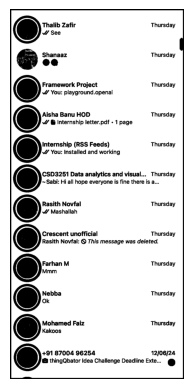

In [23]:
_, circles = remove_circle(history_mask, ismask=True, bbox=bboxes['history_bbox'], show=True, maxRadius=300, minDist=0.01,
              param1=50, param2=90, dp=0.1, circle_color = (0,255,0), thickness=10)

In [24]:
circles = sorted(circles, key=lambda x: x[1])
circles

[array([78, 94, 49]),
 array([ 78, 366,  48]),
 array([ 78, 504,  49]),
 array([ 78, 640,  49]),
 array([ 80, 640,  49]),
 array([ 78, 642,  49]),
 array([ 78, 778,  49]),
 array([ 80, 778,  49]),
 array([ 78, 916,  49]),
 array([  78, 1052,   49]),
 array([  80, 1188,   49]),
 array([  78, 1190,   49]),
 array([  80, 1190,   49]),
 array([  78, 1326,   48]),
 array([  78, 1464,   48]),
 array([  78, 1464,   48]),
 array([  80, 1600,   48])]

In [25]:
history_dict = {}

for cirlce in circles:
    x1 = cirlce[0]+cirlce[2]
    y1 = cirlce[1]-cirlce[2]
    x2 = history_mask.shape[-1]
    y2 = cirlce[1]+cirlce[2]
    history_text = pytesseract.image_to_string(history_image[y1:y2,x1:x2])
    print(history_text)

    name_and_date = history_text.split('\n')[0]
    if name_and_date != '':
        name, date = ''.join(name_and_date.split()[:-1]), ''.join(name_and_date.split()[-1])

        bottom_text = history_text.split('\n')[1:]
        if len(bottom_text) > 1:
            bottom_text = bottom_text[0]
            num_message, histroy_message = extract_and_remove_number(bottom_text)
            
        history_dict[name] = {'dateOrTime': date, 'histroy_message': histroy_message, 'num_message': num_message}

Thalib Zafir Thursday
W See

Framework Project Thursday

W You: playground.openai

Aisha Banu HOD Thursday
W & Internship letter.pdf - 1 page

Internship (RSS Feeds) Thursday
W You: Installed and working

Internship (RSS Feeds) Thursday
W You: Installed and working

Internship (RSS Feeds) Thursday
W You: Installed and working

CSD3251 Data analytics and visual... Thursday
~ Sabi: Hi all hope everyone is fine there is a...

CSD3251 Data analytics and visual... Thursday
~ Sabi: Hi all hope everyone is fine there is a...

Rasith Novfal Thursday
W Mashallah

Crescent unofficial Thursday
Rasith Novfal: © This message was deleted.

Farhan M Thursday
Mmm

Farhan M Thursday
Mmm

Farhan M Thursday
Mmm

Nebba Thursday
Ok

Mohamed Faiz Thursday
Kakoos

Mohamed Faiz Thursday
Kakoos

+91 87004 96254 12/06/24
@ thingQbator Idea Challenge Deadline Exte... e@



In [26]:
history_dict

{'ThalibZafir': {'dateOrTime': 'Thursday',
  'histroy_message': 'W See',
  'num_message': None},
 'FrameworkProject': {'dateOrTime': 'Thursday',
  'histroy_message': '',
  'num_message': None},
 'AishaBanuHOD': {'dateOrTime': 'Thursday',
  'histroy_message': 'W & Internship letter.pdf - 1 page',
  'num_message': None},
 'Internship(RSSFeeds)': {'dateOrTime': 'Thursday',
  'histroy_message': 'W You: Installed and working',
  'num_message': None},
 'CSD3251Dataanalyticsandvisual...': {'dateOrTime': 'Thursday',
  'histroy_message': '~ Sabi: Hi all hope everyone is fine there is a...',
  'num_message': None},
 'RasithNovfal': {'dateOrTime': 'Thursday',
  'histroy_message': 'W Mashallah',
  'num_message': None},
 'Crescentunofficial': {'dateOrTime': 'Thursday',
  'histroy_message': 'Rasith Novfal: © This message was deleted.',
  'num_message': None},
 'FarhanM': {'dateOrTime': 'Thursday',
  'histroy_message': 'Mmm',
  'num_message': None},
 'Nebba': {'dateOrTime': 'Thursday',
  'histroy_mes

In [27]:
chats_dict

{'Sender 1': {'message_text': 'Ouhh 9:52PM\n\nYou\ndoes it work fine?\n\nYes yes itdoes 9:52pm\n',
  'dateOrTime': '9:52PM'},
 'User 2': {'message_text': 'cool 9:53PM 7\n', 'dateOrTime': '9:53PM'},
 'Sender 3': {'message_text': "Why 9:53PM\n\nWhat're you doing 9:53pm\n",
  'dateOrTime': '9:53PM'},
 'User 4': {'message_text': 'my cable is breathing its last breath 9:53pm\n\nbreaking 9:53PM\n',
  'dateOrTime': '9:53pm'},
 'Sender 5': {'message_text': 'Dang 9:53PM\n\nSo you getting anew one or wha 9:53PM\n',
  'dateOrTime': '9:53PM'},
 'User 6': {'message_text': 'Ihave 2 more cable 9:54pm YW\none is type c end (very imp, gonna save this 9:54PM 4\n\nOther normal one | will keep as a backup 9:54PM /\n',
  'dateOrTime': '9:54pm'},
 'Sender 7': {'message_text': 'lolok 9:54pm\n\nIght Ight 9:5aiv\n',
  'dateOrTime': '9:54pm'},
 'Sender 9': {'message_text': 'Wed, 12 Jun\n', 'dateOrTime': None},
 'User 10': {'message_text': 'Hello 9:04AM VW\n', 'dateOrTime': '9:04AM'},
 'Sender 11': {'message_tex

In [28]:
history_dict

{'ThalibZafir': {'dateOrTime': 'Thursday',
  'histroy_message': 'W See',
  'num_message': None},
 'FrameworkProject': {'dateOrTime': 'Thursday',
  'histroy_message': '',
  'num_message': None},
 'AishaBanuHOD': {'dateOrTime': 'Thursday',
  'histroy_message': 'W & Internship letter.pdf - 1 page',
  'num_message': None},
 'Internship(RSSFeeds)': {'dateOrTime': 'Thursday',
  'histroy_message': 'W You: Installed and working',
  'num_message': None},
 'CSD3251Dataanalyticsandvisual...': {'dateOrTime': 'Thursday',
  'histroy_message': '~ Sabi: Hi all hope everyone is fine there is a...',
  'num_message': None},
 'RasithNovfal': {'dateOrTime': 'Thursday',
  'histroy_message': 'W Mashallah',
  'num_message': None},
 'Crescentunofficial': {'dateOrTime': 'Thursday',
  'histroy_message': 'Rasith Novfal: © This message was deleted.',
  'num_message': None},
 'FarhanM': {'dateOrTime': 'Thursday',
  'histroy_message': 'Mmm',
  'num_message': None},
 'Nebba': {'dateOrTime': 'Thursday',
  'histroy_mes